## CS5785 Assignment 2
## Name: Xianhui Li, Zimeng Zhu
## House Prices

In [551]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

### Read the csv file

In [604]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [605]:
train_ID = train['Id'] #store ID
train.drop("Id", axis = 1, inplace = True) #drop id, since it's not related to prediction
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Scatter Matrix

In [606]:
data_0 = train
data_0['Condition1'] = data_0['Condition1'].map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
data_0['ExterQual'] = data_0['ExterQual'].map({'TA':1,'Gd':2,'Ex':3,'Fa':4})

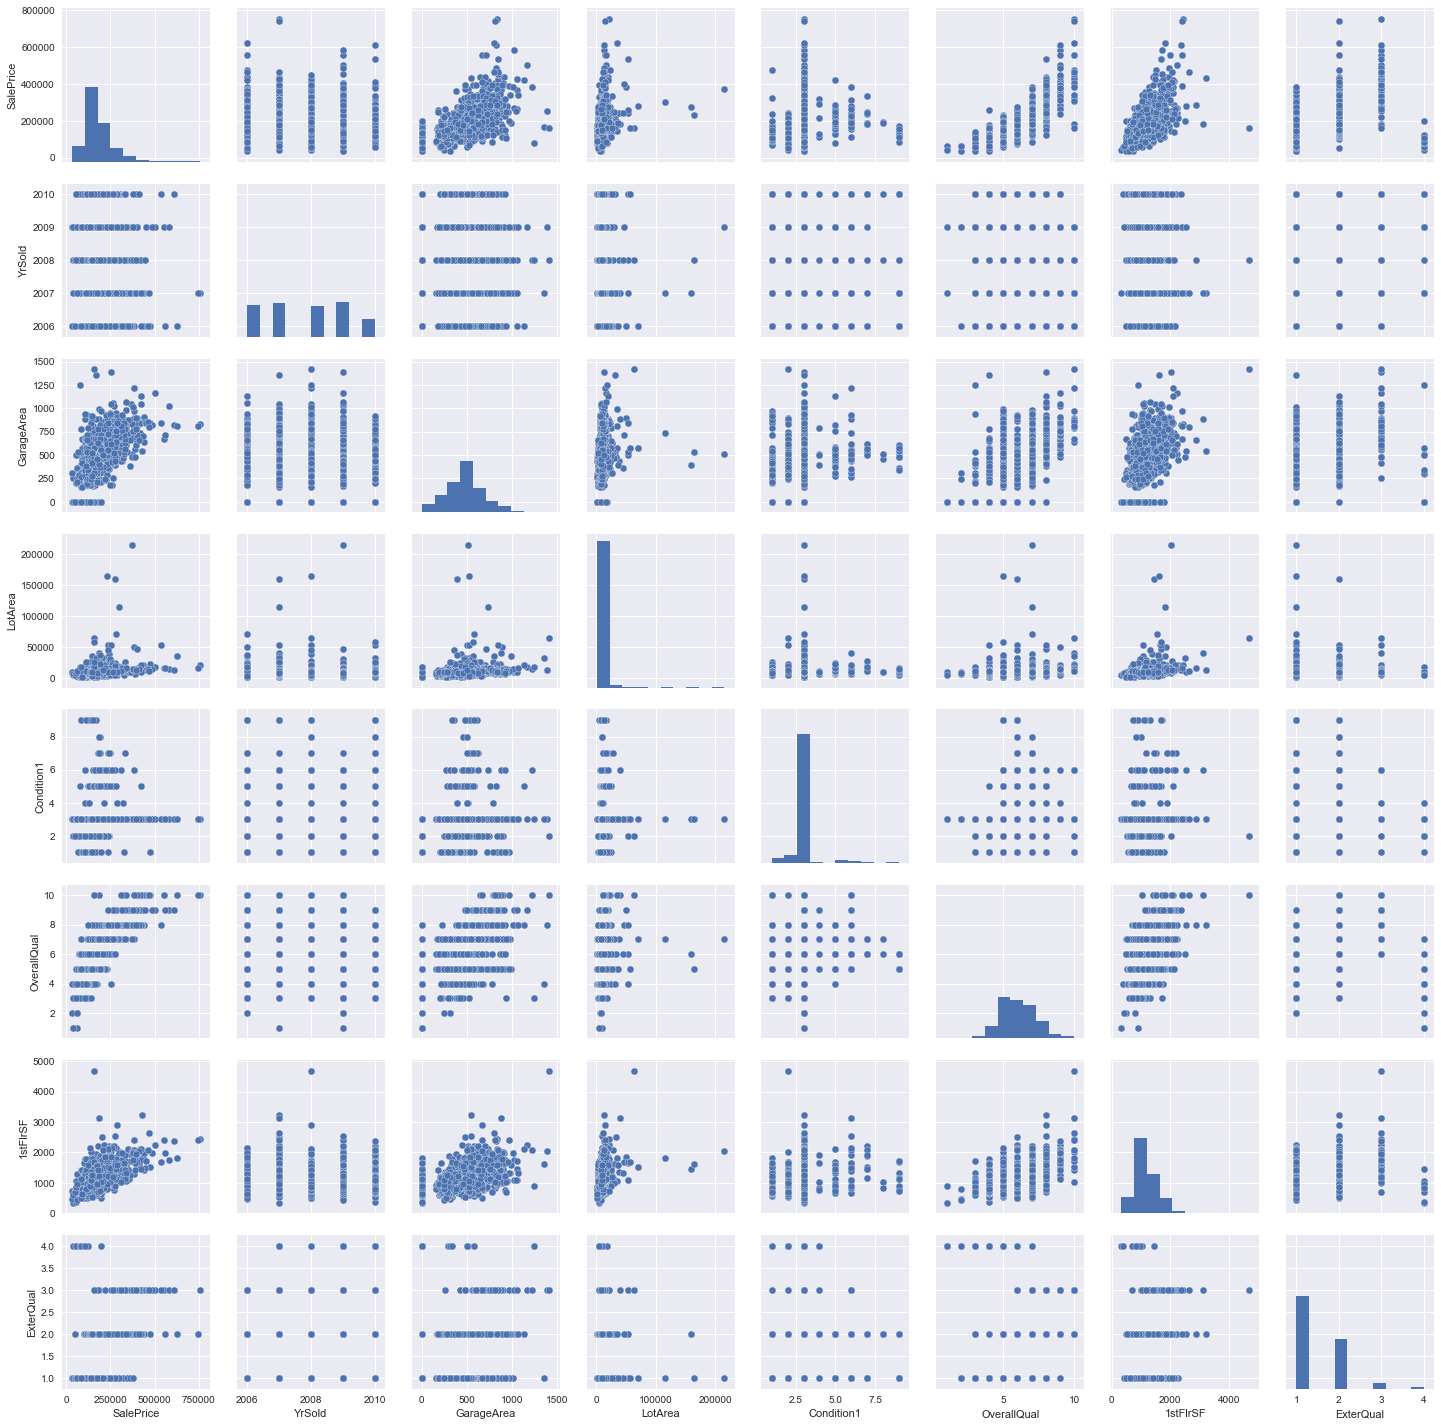

In [507]:
variables = data_0[['SalePrice','YrSold','GarageArea','LotArea','Condition1','OverallQual','1stFlrSF','ExterQual']]
sns.pairplot(variables)
sns.plt.show()

### Change categorical features into dummies

In [607]:
data = train
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [608]:
data['MSSubClass'] = data['MSSubClass'].map({20:'MS20',30:'MS30',40:'MS40',45:'MS45',50:'MS50',60:'MS60',70:'MS70',75:'MS75',80:'MS80',85:'MS85',90:'MS90',120:'MS120',150:'MS150',160:'MS160',180:'MS180',190:'MS190'})

In [609]:
data['OverallQual'] = data['OverallQual'].map({1:'OQ1',2:'OQ2',3:'OQ3',4:'OQ4',5:'OQ5',6:'OQ6',7:'OQ7',8:'OQ8',9:'OQ9',10:'OQ10'})

In [610]:
data['OverallCond'] = data['OverallCond'].map({1:'OC1',2:'OC2',3:'OC3',4:'OC4',5:'OC5',6:'OC6',7:'OC7',8:'OC8',9:'OC9',10:'OC10'})

In [611]:
data = pd.get_dummies(data)
data.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,2003,2003,196.0,2,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,2,1976,1976,0.0,1,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,3,2001,2002,162.0,2,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,3,1915,1970,0.0,1,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,3,2000,2000,350.0,2,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Fill NA's

In [612]:
data = data.fillna(data.mean())
data.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,3,2003,2003,196.0,2,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,2,1976,1976,0.0,1,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,3,2001,2002,162.0,2,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,3,1915,1970,0.0,1,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,3,2000,2000,350.0,2,655,0,490,...,0,0,0,1,0,0,0,0,1,0


### Run ordinary least squares on all the features

In [676]:
import statsmodels.api as sm
X = data.loc[:,data.columns !='SalePrice']
Y = data['SalePrice']
print(X.shape, Y.shape)

(1460, 308) (1460,)


In [293]:
sm.OLS(Y,sm.add_constant(X)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     65.05
Date:                Tue, 02 Oct 2018   Prob (F-statistic):               0.00
Time:                        18:44:31   Log-Likelihood:                -16531.
No. Observations:                1460   AIC:                         3.360e+04
Df Residuals:                    1189   BIC:                         3.504e+04
Df Model:                         270                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                 -6.983e+04   1.55e+05     -0.451      0.652     -3.74e+05  2.34e+05
LotFrontage              49.6901     43.015      1.155      0.248       -34.704   134.084
LotArea                   0.6394      0.108      5.897      0.000         0.427     0.852
Condition1             -529.7518    813.725     -0.651      0.515     -2126.249  1066.746
YearBuilt               341.3104     83.286      4.098      0.000       177.907   504.714
YearRemodAdd            103.7712     56.108      1.850      0.065        -6.310   213.852
MasVnrArea               17.2330      5.697      3.025      0.003         6.055    28.411
ExterQual               850.2264   1928.753      0.441      0.659     -2933.912  4634.365
BsmtFinSF1               14.5806      2.869      5.083      0.000         8.952    20.209
BsmtFinSF2               11.9593      5.864      2.039      0.042         0.454    23.465
BsmtUnfSF                -2.1882      2.738     -0.799      0.424        -7.561     3.184
TotalBsmtSF              24.3517      4.044      6.022      0.000        16.417    32.286
1stFlrSF                 17.5351      6.421      2.731      0.006         4.937    30.133
2ndFlrSF                 35.8439      5.482      6.539      0.000        25.089    46.599
LowQualFinSF            -28.1139     13.999     -2.008      0.045       -55.580    -0.648
GrLivArea                25.2651      5.711      4.424      0.000        14.061    36.469
BsmtFullBath           1498.4380   1957.761      0.765      0.444     -2342.614  5339.490
BsmtHalfBath            651.6081   2993.556      0.218      0.828     -5221.632  6524.848
FullBath               4560.8329   2200.515      2.073      0.038       243.507  8878.158
HalfBath               1242.8678   2069.203      0.601      0.548     -2816.827  5302.563
BedroomAbvGr          -2792.4810   1387.992     -2.012      0.044     -5515.668   -69.294
KitchenAbvGr          -1.389e+04   6107.895     -2.274      0.023     -2.59e+04 -1904.826
TotRmsAbvGrd           1495.0257    949.866      1.574      0.116      -368.575  3358.627
Fireplaces             5976.3428   2532.057      2.360      0.018      1008.546  1.09e+04
GarageYrBlt             -11.5237     60.480     -0.191      0.849      -130.183   107.136
GarageCars             2815.1310   2267.210      1.242      0.215     -1633.048  7263.310
GarageArea               18.5411      7.856      2.360      0.018         3.129    33.953
WoodDeckSF               11.3636      5.790      1.963      0.050         0.003    22.724
OpenPorchSF               4.5705     11.501      0.397      0.691       -17.995    27.136
EnclosedPorch            10.9480     12.469      0.878      0.380       -13.515    35.411
3SsnPorch                41.5544     21.630      1.921      0.055        -0.884    83.993
ScreenPorch            

### Run a variety of regression methods

In [709]:
import sklearn
import sklearn.linear_model
from sklearn.preprocessing import StandardScaler
# standardize features
sc = StandardScaler()
sc.fit(data)   
data_std = sc.transform(data)
print(data_std)

[[-0.22937175 -0.20714171 -0.03510278 ..., -0.11785113  0.4676514
  -0.30599503]
 [ 0.4519361  -0.09188637 -1.17399303 ..., -0.11785113  0.4676514
  -0.30599503]
 [-0.09311018  0.07347998 -0.03510278 ..., -0.11785113  0.4676514
  -0.30599503]
 ..., 
 [-0.18395123 -0.14781027 -0.03510278 ..., -0.11785113  0.4676514
  -0.30599503]
 [-0.09311018 -0.08016039 -0.03510278 ..., -0.11785113  0.4676514
  -0.30599503]
 [ 0.22483348 -0.05811155 -0.03510278 ..., -0.11785113  0.4676514
  -0.30599503]]


In [678]:
df = pd.DataFrame(columns = data.columns)
for i in range(data_std.shape[0]):
    df.loc[i,:]=data_std[i] 
df.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.229372,-0.207142,-0.0351028,1.05099,0.878668,0.511418,0.924558,0.575425,-0.288653,-0.944591,...,-0.058621,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995
1,0.451936,-0.0918864,-1.17399,0.156734,-0.429577,-0.57441,-0.709648,1.17199,-0.288653,-0.641228,...,-0.058621,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995
2,-0.0931102,0.07348,-0.0351028,0.984752,0.830215,0.32306,0.924558,0.0929072,-0.288653,-0.301643,...,-0.058621,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995
3,-0.456474,-0.0968975,-0.0351028,-1.86363,-0.720298,-0.57441,-0.709648,-0.499274,-0.288653,-0.0616696,...,-0.058621,-0.301962,-0.0453765,0.390293,3.66817,-0.0524142,-0.0910346,-0.117851,-2.13834,-0.305995
4,0.633618,0.375148,-0.0351028,0.951632,0.733308,1.36457,0.924558,0.463568,-0.288653,-0.174865,...,-0.058621,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995


In [679]:
df.shape

(1460, 309)

In [812]:
#train-test split
from sklearn.model_selection import train_test_split

X_std = df.loc[:,df.columns !='SalePrice']
Y_std = df['SalePrice']
X_train, X_test, Y_train, Y_test = train_test_split(X_std,Y_std,test_size=0.2)
X_train_orig, X_test_orig, Y_train_orig, Y_test_orig = train_test_split(X,Y,test_size=0.2)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)
print(X_train_orig.shape, Y_train_orig.shape)
print(X_test_orig.shape, Y_test_orig.shape)
print(X_std.shape, Y_std.shape)

(1168, 308) (1168,)
(292, 308) (292,)
(1168, 308) (1168,)
(292, 308) (292,)
(1460, 308) (1460,)


In [316]:
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

In [317]:
from sklearn.linear_model import  Lasso, Ridge, RidgeCV, LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [382]:
#OLS
OLS = LinearRegression().fit(X_train_orig,Y_train_orig)
Y_pred = OLS.predict(X_test_orig)
OLS.score(X_test_orig,Y_test_orig)

0.78161718982919015

In [383]:
#kNN
kneigh_score_list = []
k = range(1,15)
maximum = 0
index = 0
for i in k:
    kneigh = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(kneigh,X_train_orig,Y_train_orig,cv=10).mean()
    if scores > maximum:
        maximum = scores
        index = i
    kneigh_score_list.append(scores)
print(index)

7


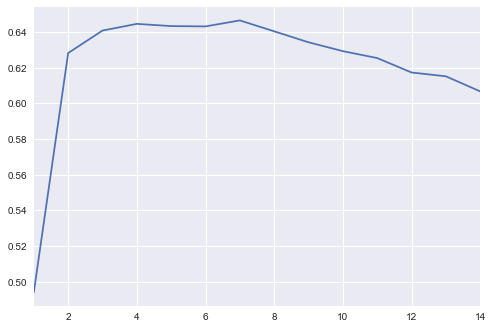

crossvalidation gives best k at 7


In [384]:
import matplotlib.pyplot as plt
pd.Series(kneigh_score_list,index=k).plot()
plt.show()
print("crossvalidation gives best k at 7")

In [385]:
kneigh = KNeighborsRegressor(n_neighbors=7)
kneigh.fit(X_train, Y_train)
kneigh.score(X_test,Y_test)

0.75715459812305352

In [394]:
# Ridge regression
ridgecv = RidgeCV(alphas=(520, 510, 500), cv=10).fit(X_train,Y_train)
print(ridgecv.alpha_)
ridgecv.score(X_test,Y_test)

510


0.87200628920618084

In [397]:
#LASSO
alpha = np.arange(0.005,0.02,0.001)
lasso_score_list = []
for i in alpha:
    lasso = Lasso(alpha=i)
    scores = cross_val_score(lasso,X_train,Y_train,cv=10).mean()
    lasso_score_list.append(scores)

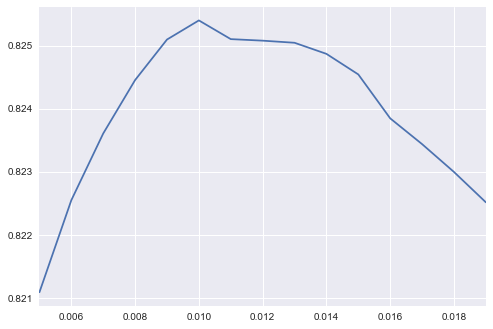

In [399]:
pd.Series(lasso_score_list,index=alpha).plot()
plt.show()

In [400]:
lasso = Lasso(alpha=0.01).fit(X_train,Y_train)
lasso.score(X_test,Y_test)

0.87936488777119148

In [849]:
# find the features lasso choose
coef = lasso.coef_
fea = []
col_names = data.columns
for i in range(len(coef)):
    if coef[i] != 0:
        fea.append(col_names[i])
print(fea)

['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'BsmtFinSF1', 'TotalBsmtSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'ScreenPorch', 'PoolArea', 'MSSubClass_MS90', 'MSZoning_C (all)', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR1', 'LotShape_Reg', 'LotConfig_Corner', 'Neighborhood_BrDale', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Condition2_PosA', 'Condition2_RRNn', 'OverallQual_OQ1', 'OverallQual_OQ4', 'OverallQual_OQ6', 'OverallQual_OQ7', 'OverallQual_OQ8', 'OverallCond_OC2', 'OverallCond_OC3', 'OverallCond_OC4', 'OverallCond_OC6', 'OverallCond_OC8', 'RoofStyle_Shed', 'RoofMatl_CompShg', 'RoofMatl_WdShake', 'Exterior1st_BrkComm', 'Exterior2nd_Wd Shng', 'Foundation_CBlock', 'Foundation_Wood', 'BsmtQual_Gd', 'B

### Forward stepwise (linear) regression

In [358]:
import numpy as np
ols_model = LinearRegression()
predictors = X_train_orig.columns.values.tolist()
M_predictors_f = []
M_scores_f = []
i = 0
while len(predictors) > 1:
    max_score = 0
    max_pre = None
    max_index = 0
    for j in range(len(predictors)):
        with_j = None
        if i == 0:
            with_j = [predictors[j]]
        else:
            with_j = M_predictors_f[:]+[predictors[j]]
        score_j = cross_val_score(ols_model, X_train_orig[with_j], Y_train_orig, cv=10).mean()
        if score_j > max_score:
            max_score = score_j
            max_pre = with_j
            max_index = j
    if max_score == 0:
        max_pre = M_predictors_f[:]+[predictors[0]]
        max_score = 0
        max_index = 0
    M_predictors_f = max_pre[:]
    M_scores_f.append(max_score)
    if max_index == 0:
        predictors = predictors[1:]
    elif max_index == len(predictors)-1:
        predictors = predictors[:max_index]
    else:
        predictors = predictors[:max_index]+predictors[max_index+1:]
    i += 1
    print(i, max_score)
    ## print(max_pre)
## print(M_scores_f)
print("max score is", max(M_scores_f))
print("features:", M_predictors_f[0:np.argmax(M_scores_f)+1])
##print(M_predictors_f)

1 0.495009791287
2 0.661229663717
3 0.720764968312
4 0.740445789823
5 0.759205756882
6 0.773462832822
7 0.788136354042
8 0.798702011913
9 0.807618418796
10 0.813936723525
11 0.821071996278
12 0.827276947353
13 0.830451034508
14 0.833757932533
15 0.837416921494
16 0.840317961764
17 0.842773680005
18 0.845098936247
19 0.847363804484
20 0.84975752749
21 0.851941674149
22 0.854263613199
23 0.856603206596
24 0.858143182433
25 0.859661107658
26 0.860930475657
27 0.862229655257
28 0.86330946061
29 0.86433963928
30 0.86515354853
31 0.866411682507
32 0.867020562121
33 0.867673320744
34 0.868368497345
35 0.869520068565
36 0.873876474854
37 0.875331216439
38 0.875824801049
39 0.876170130068
40 0.876483704425
41 0.8767762838
42 0.877073107088
43 0.877408245905
44 0.877691346764
45 0.877939214778
46 0.878191055233
47 0.878441816305
48 0.878668165638
49 0.878916264002
50 0.879130169145
51 0.879339055501
52 0.879566921264
53 0.87979381959
54 0.880006214561
55 0.880176310687
56 0.880506365745
57 0.880

In [366]:
features = M_predictors_f[0:np.argmax(M_scores_f)+1]
print(len(features))
OLS = LinearRegression().fit(X_train_orig[features],Y_train_orig)
Y_pred = OLS.predict(X_test_orig[features])
print("the R^2 of forward stepwise (linear) regression:",OLS.score(X_test_orig[features],Y_test_orig))

97
the R^2 of forward stepwise (linear) regression: 0.878534189871


### Backward stepwise (linear) regression

In [365]:
import numpy as np
ols_model = LinearRegression()
predictors = X_train_orig.columns.values.tolist()
M_predictors = []
M_scores = []
i = len(predictors)
while len(predictors) > 1:
    max_score = 0
    max_pre = None
    max_index = 0
    for j in range(len(predictors)):
        list_without_j = None
        if j == 0:
            list_without_j = predictors[1:]
        elif j == len(predictors)-1:
            list_without_j = predictors[:j]
        else:
            list_without_j = predictors[:j]+predictors[j+1:]
        score_j = cross_val_score(ols_model, X_train_orig[list_without_j], Y_train_orig, cv=10).mean()
        if score_j > max_score:
            max_score = score_j
            max_index = j
            max_pre = predictors[j]
    if max_score == 0:
        max_pre = predictors[0]
        max_score = 0
        max_index = 0
    M_predictors.append(max_pre)
    M_scores.append(max_score)
    if max_index == 0:
        predictors = predictors[1:]
    elif max_index == len(predictors)-1:
        predictors = predictors[:max_index]
    else:
        predictors = predictors[:max_index]+predictors[max_index+1:]
    i -= 1
    print(i, max_score)
print("max score is", max(M_scores))
orig_features = X_train_orig.columns.values.tolist()[:]
best_features = [x for x in orig_features if x not in M_predictors[0:np.argmax(M_scores)+1]]
print("features:", len(best_features), best_features)

307 0.805249157919
306 0.81780820198
305 0.819959465953
304 0.821578041203
303 0.823575406066
302 0.824773499427
301 0.826021730127
300 0.826837581045
299 0.827623794714
298 0.828361549638
297 0.829062891324
296 0.829633007117
295 0.830093013487
294 0.830538377099
293 0.830948971166
292 0.831337167563
291 0.83168368506
290 0.832024821551
289 0.832343674943
288 0.832646085924
287 0.832945837517
286 0.833203569666
285 0.83346406633
284 0.833744457728
283 0.834065735344
282 0.83433570635
281 0.834566390332
280 0.834793209955
279 0.835009983062
278 0.835204427102
277 0.835422392611
276 0.835605939852
275 0.835968994514
274 0.836144304669
273 0.836316720687
272 0.836479066079
271 0.838204276047
270 0.838789107415
269 0.839135579857
268 0.8395034523
267 0.839833157015
266 0.840105559766
265 0.840260773881
264 0.840427574656
263 0.840564627418
262 0.841707239365
261 0.842951149872
260 0.84363500057
259 0.844071073732
258 0.84443229786
257 0.844757985915
256 0.845078592844
255 0.845348703312
2

In [855]:
best_features = ['LotArea', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'Fireplaces', 'GarageCars', 'WoodDeckSF', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MSSubClass_MS120', 'MSSubClass_MS160', 'MSSubClass_MS180', 'MSSubClass_MS190', 'MSSubClass_MS20', 'MSSubClass_MS30', 'MSSubClass_MS40', 'MSSubClass_MS45', 'MSSubClass_MS50', 'MSSubClass_MS60', 'MSSubClass_MS70', 'MSSubClass_MS75', 'MSSubClass_MS80', 'MSSubClass_MS85', 'MSSubClass_MS90', 'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Grvl', 'Street_Pave', 'Alley_Pave', 'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_Bnk', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_AllPub', 'Utilities_NoSeWa', 'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Gtl', 'LandSlope_Mod', 'LandSlope_Sev', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition2_Feedr', 'Condition2_Norm', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRNn', 'BldgType_1Fam', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin', 'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'OverallQual_OQ1', 'OverallQual_OQ10', 'OverallQual_OQ2', 'OverallQual_OQ3', 'OverallQual_OQ4', 'OverallQual_OQ5', 'OverallQual_OQ6', 'OverallQual_OQ7', 'OverallQual_OQ8', 'OverallQual_OQ9', 'OverallCond_OC1', 'OverallCond_OC2', 'OverallCond_OC3', 'OverallCond_OC4', 'OverallCond_OC5', 'OverallCond_OC6', 'OverallCond_OC7', 'OverallCond_OC8', 'OverallCond_OC9', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_ClyTile', 'RoofMatl_CompShg', 'RoofMatl_Membran', 'Exterior1st_AsbShng', 'Exterior1st_CBlock', 'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior2nd_AsbShng', 'Exterior2nd_BrkFace', 'Exterior2nd_CBlock', 'Exterior2nd_ImStucc', 'Exterior2nd_Wd Sdng', 'MasVnrType_Stone', 'ExterCond_Ex', 'ExterCond_Po', 'ExterCond_TA', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood', 'BsmtQual_Ex', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd', 'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ', 'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ', 'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'BsmtFinType2_BLQ', 'BsmtFinType2_LwQ', 'BsmtFinType2_Rec', 'Heating_Floor', 'HeatingQC_Ex', 'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA', 'CentralAir_N', 'CentralAir_Y', 'Electrical_Mix', 'Electrical_SBrkr', 'KitchenQual_Ex', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Typ', 'FireplaceQu_Ex', 'FireplaceQu_Po', 'GarageType_2Types', 'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_Fin', 'GarageFinish_RFn', 'GarageFinish_Unf', 'GarageQual_Fa', 'GarageCond_Ex', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_N', 'PavedDrive_P', 'PavedDrive_Y', 'PoolQC_Ex', 'PoolQC_Fa', 'PoolQC_Gd', 'Fence_MnPrv', 'MiscFeature_Gar2', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal', 'SaleCondition_Partial']
print(len(best_features))
OLS = LinearRegression().fit(X_train_orig[best_features],Y_train_orig)
Y_pred = OLS.predict(X_test_orig[best_features])
print("the R^2 of backward stepwise (linear) regression:",OLS.score(X_test_orig[best_features],Y_test_orig))

214
the R^2 of backward stepwise (linear) regression: 0.633004229999


In [853]:
len(features)

97

### Quadratic features

In [401]:
from sklearn.preprocessing import PolynomialFeatures

In [402]:
poly = PolynomialFeatures(2)
quadratic = poly.fit_transform(X)
#X_qua = pd.DataFrame(quadratic)
X1 = X.values
X_new0 = np.concatenate([X1,quadratic],axis=1)
X_new = pd.DataFrame(X_new0)
X_new.shape,type(X_new)

((1460, 48203), pandas.core.frame.DataFrame)

In [403]:
from sklearn.model_selection import train_test_split
X_train_norig, X_test_norig, Y_train_norig, Y_test_norig = train_test_split(X_new,Y,test_size=0.2)
X_train_norig.head()

,0,1,2,3,4,5,6,7,8,9,...,48193,48194,48195,48196,48197,48198,48199,48200,48201,48202
818,80.0,8816.0,3.0,1971.0,1971.0,80.0,1.0,504.0,0.0,506.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1371,80.0,9600.0,3.0,1955.0,1996.0,0.0,1.0,831.0,0.0,161.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
756,68.0,10769.0,3.0,2007.0,2007.0,0.0,2.0,20.0,0.0,846.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87,40.0,3951.0,3.0,2009.0,2009.0,76.0,2.0,0.0,0.0,612.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1101,61.0,9758.0,3.0,1971.0,1971.0,0.0,1.0,412.0,287.0,251.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [409]:
#kNN2
kneighn_score_list = []
k = range(3,7)
maximum = 0
index = 0
for i in k:
    print (i)
    kneighn = KNeighborsRegressor(n_neighbors=i)
    scoresn = cross_val_score(kneighn,X_train_norig,Y_train_norig,cv=10).mean()
    if scoresn > maximum:
        maximum = scoresn
        index = i
    kneighn_score_list.append(scoresn)
print(index)

3
4
5
6
5


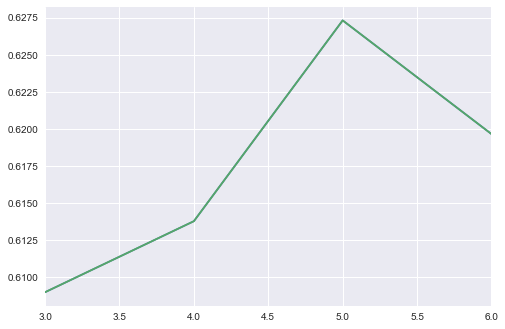

crossvalidation gives best k at 5


In [411]:
pd.Series(kneighn_score_list,index=k).plot()
plt.show()
print("crossvalidation gives best k at 5")

In [413]:
kneighn = KNeighborsRegressor(n_neighbors=5)
kneighn.fit(X_train_norig, Y_train_norig)
kneighn.score(X_test_norig,Y_test_norig)

0.60798196253253312

In [414]:
poly = PolynomialFeatures(2)
quadratic_std = poly.fit_transform(X_std)
#X_qua = pd.DataFrame(quadratic)
X_std1 = X_std.values
X_std_new1 = np.concatenate([X_std1,quadratic_std],axis=1)
X_std_new = pd.DataFrame(X_std_new1)
X_std_new.shape,type(X_std_new)

((1460, 48203), pandas.core.frame.DataFrame)

In [415]:
from sklearn.model_selection import train_test_split
X_train_n, X_test_n, Y_train_n, Y_test_n = train_test_split(X_std_new,Y_std,test_size=0.2)
X_train_n.head()

,0,1,2,3,4,5,6,7,8,9,...,48193,48194,48195,48196,48197,48198,48199,48200,48201,48202
212,0.0885719,-0.1881,-0.0351028,1.24972,1.16939,-0.57441,-0.709648,0.829843,-0.288653,-1.10759,...,0.00828729,0.0107285,0.194663,-0.297503,0.0138889,0.252006,-0.385141,4.57252,-6.98817,10.68
237,6.45464e-16,-0.106619,5.65935,0.719786,0.878668,-0.57441,0.924558,-0.0913268,-0.288653,0.060581,...,0.00828729,0.0107285,-0.0425724,0.0278561,0.0138889,-0.0551132,0.0360619,0.218698,-0.143099,0.093633
64,6.45464e-16,-0.114436,-0.0351028,0.852269,0.6364,2.59998,-0.709648,0.647802,-0.288653,-0.564255,...,0.00828729,0.0107285,-0.0425724,0.0278561,0.0138889,-0.0551132,0.0360619,0.218698,-0.143099,0.093633
454,-0.320213,-0.122254,-0.0351028,0.156734,-0.429577,-0.57441,-0.709648,2.54936,-0.288653,-1.00798,...,0.00828729,-0.772454,0.194663,0.0278561,72,-18.1445,-2.59645,4.57252,0.654323,0.093633
335,6.45464e-16,15.4485,-0.0351028,-0.207594,-0.962566,-0.57441,-0.709648,1.76637,0.622896,-1.05099,...,0.00828729,0.0107285,-0.0425724,0.0278561,0.0138889,-0.0551132,0.0360619,0.218698,-0.143099,0.093633


In [418]:
# Ridge regression
ridgecv = RidgeCV(alphas=(7000, 1000, 5000),cv=10).fit(X_train_n,Y_train_n)
print(ridgecv.alpha_)
ridgecv.score(X_test_n,Y_test_n)

5000


0.79809564481086814

In [419]:
#LASSO
alpha = np.arange(0.005,0.015,0.003)
lasson_score_list = []
for i in alpha:
    lasson = Lasso(alpha=i)
    scoresn = cross_val_score(lasson,X_train_n,Y_train_n,cv=10).mean()
    lasson_score_list.append(scoresn)

/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objectiv

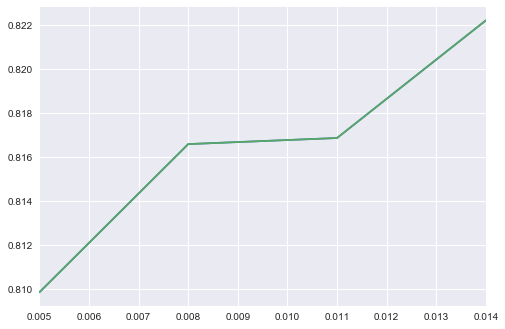

In [421]:
pd.Series(lasson_score_list,index=alpha).plot()
plt.show()

In [425]:
lasso = Lasso(alpha=0.03).fit(X_train_n,Y_train_n)
lasso.score(X_test_n,Y_test_n)

0.81373158434890946

### Train Lasso classifier with all of the training data, and generate test labels on the Kaggle test set

In [800]:
test = pd.read_csv("test.csv")
test.drop("Id", axis = 1, inplace = True)
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [801]:
data1 = test

In [802]:
data1['MSSubClass'] = data1['MSSubClass'].map({20:'MS20',30:'MS30',40:'MS40',45:'MS45',50:'MS50',60:'MS60',70:'MS70',75:'MS75',80:'MS80',85:'MS85',90:'MS90',120:'MS120',150:'MS150',160:'MS160',180:'MS180',190:'MS190'})

In [803]:
data1['OverallQual'] = data1['OverallQual'].map({1:'OQ1',2:'OQ2',3:'OQ3',4:'OQ4',5:'OQ5',6:'OQ6',7:'OQ7',8:'OQ8',9:'OQ9',10:'OQ10'})

In [804]:
data1['OverallCond'] = data1['OverallCond'].map({1:'OC1',2:'OC2',3:'OC3',4:'OC4',5:'OC5',6:'OC6',7:'OC7',8:'OC8',9:'OC9',10:'OC10'})

In [805]:
data1['Condition1'] = data1['Condition1'].map({'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9})
data1['ExterQual'] = data1['ExterQual'].map({'TA':1,'Gd':2,'Ex':3,'Fa':4})

In [806]:
data1 = pd.get_dummies(data1)
data1 = data1.fillna(data1.mean())
data1.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,2,1961,1961,0.0,1,468.0,144.0,270.0,...,0,0,0,1,0,0,0,0,1,0
1,81.0,14267,3,1958,1958,108.0,1,923.0,0.0,406.0,...,0,0,0,1,0,0,0,0,1,0
2,74.0,13830,3,1997,1998,0.0,1,791.0,0.0,137.0,...,0,0,0,1,0,0,0,0,1,0
3,78.0,9978,3,1998,1998,20.0,1,602.0,0.0,324.0,...,0,0,0,1,0,0,0,0,1,0
4,43.0,5005,3,1992,1992,0.0,2,263.0,0.0,1017.0,...,0,0,0,1,0,0,0,0,1,0


In [807]:
sc = StandardScaler()
sc.fit(data1)   
data1_std = sc.transform(data1)
print(data1_std.shape)

(1459, 291)


In [813]:
df1 = pd.DataFrame(columns = data1.columns)
for i in range(data1_std.shape[0]):
    df1.loc[i,:]=data1_std[i] 
df1.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.555587,0.363929,-1.08521,-0.340945,-1.07288,-0.570108,-0.710983,0.0632947,0.517348,-0.650619,...,-0.0453921,-0.295268,-0.0524323,0.399722,-0.254879,-0.0742525,-0.091066,-0.134699,0.460211,-0.299365
1,0.604239,0.897861,-0.076725,-0.439695,-1.21491,0.0412731,-0.710983,1.06339,-0.297903,-0.339378,...,-0.0453921,-0.295268,-0.0524323,0.399722,-0.254879,-0.0742525,-0.091066,-0.134699,0.460211,-0.299365
2,0.263676,0.809646,-0.076725,0.844059,0.678742,-0.570108,-0.710983,0.773254,-0.297903,-0.954994,...,-0.0453921,-0.295268,-0.0524323,0.399722,-0.254879,-0.0742525,-0.091066,-0.134699,0.460211,-0.299365
3,0.458284,0.0320639,-0.076725,0.876976,0.678742,-0.456889,-0.710983,0.357829,-0.297903,-0.527038,...,-0.0453921,-0.295268,-0.0524323,0.399722,-0.254879,-0.0742525,-0.091066,-0.134699,0.460211,-0.299365
4,-1.24453,-0.971808,-0.076725,0.679475,0.394694,-0.570108,0.851252,-0.387298,-0.297903,1.05892,...,-0.0453921,-0.295268,-0.0524323,0.399722,-0.254879,-0.0742525,-0.091066,-0.134699,0.460211,-0.299365


In [814]:
print(X_std.shape, Y_std.shape)

(1460, 308) (1460,)


In [816]:
df1.shape

(1459, 291)

In [817]:
missing_cols = set( X_std.columns ) - set( df1.columns )
missing_cols1 = set( df1.columns ) - set( X_std.columns )

In [818]:
X_std['MSSubClass_MS150'] = 0
X_std.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MSSubClass_MS150
0,-0.229372,-0.207142,-0.0351028,1.05099,0.878668,0.511418,0.924558,0.575425,-0.288653,-0.944591,...,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995,0
1,0.451936,-0.0918864,-1.17399,0.156734,-0.429577,-0.57441,-0.709648,1.17199,-0.288653,-0.641228,...,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995,0
2,-0.0931102,0.07348,-0.0351028,0.984752,0.830215,0.32306,0.924558,0.0929072,-0.288653,-0.301643,...,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995,0
3,-0.456474,-0.0968975,-0.0351028,-1.86363,-0.720298,-0.57441,-0.709648,-0.499274,-0.288653,-0.0616696,...,-0.301962,-0.0453765,0.390293,3.66817,-0.0524142,-0.0910346,-0.117851,-2.13834,-0.305995,0
4,0.633618,0.375148,-0.0351028,0.951632,0.733308,1.36457,0.924558,0.463568,-0.288653,-0.174865,...,-0.301962,-0.0453765,0.390293,-0.272616,-0.0524142,-0.0910346,-0.117851,0.467651,-0.305995,0


In [820]:
for i in missing_cols:
    df1[i] = 0
df1.head()

,LotFrontage,LotArea,Condition1,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Utilities_NoSeWa,Condition2_RRAe,RoofMatl_Metal,Heating_OthW,Exterior1st_Stone,Electrical_Mix,MiscFeature_TenC,RoofMatl_Membran,Exterior2nd_Other,PoolQC_Fa
0,0.555587,0.363929,-1.08521,-0.340945,-1.07288,-0.570108,-0.710983,0.0632947,0.517348,-0.650619,...,0,0,0,0,0,0,0,0,0,0
1,0.604239,0.897861,-0.076725,-0.439695,-1.21491,0.0412731,-0.710983,1.06339,-0.297903,-0.339378,...,0,0,0,0,0,0,0,0,0,0
2,0.263676,0.809646,-0.076725,0.844059,0.678742,-0.570108,-0.710983,0.773254,-0.297903,-0.954994,...,0,0,0,0,0,0,0,0,0,0
3,0.458284,0.0320639,-0.076725,0.876976,0.678742,-0.456889,-0.710983,0.357829,-0.297903,-0.527038,...,0,0,0,0,0,0,0,0,0,0
4,-1.24453,-0.971808,-0.076725,0.679475,0.394694,-0.570108,0.851252,-0.387298,-0.297903,1.05892,...,0,0,0,0,0,0,0,0,0,0


In [821]:
print(X_std.shape, Y_std.shape)

(1460, 309) (1460,)


In [822]:
#LASSO
alpha = np.arange(0.005,0.02,0.001)
lasso_score_list = []
for i in alpha:
    lasso = Lasso(alpha=i)
    scores = cross_val_score(lasso,X_std,Y_std,cv=10).mean()
    lasso_score_list.append(scores)

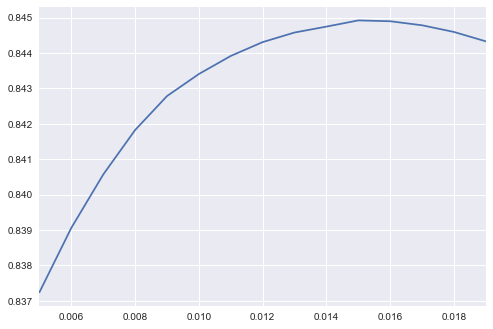

In [823]:
pd.Series(lasso_score_list,index=alpha).plot()
plt.show()

In [824]:
lasso = Lasso(alpha=0.015).fit(X_std,Y_std)
pred = lasso.predict(df1)

In [825]:
pred

array([-0.34263481, -0.12388301,  0.42936654, ...,  0.25239008,
       -0.58371135,  0.28409458])

In [834]:
len(pred)

1459

In [837]:
sc1 = StandardScaler()
sc1.fit(Y)
pred1 = sc1.inverse_transform(pred)

/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/Users/xianhuili/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [840]:
import csv
with open("submission.csv","w") as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["Id","SalePrice"])
    for i in range(len(pred1)):
        predict = pred1[i]
        writer.writerows([[i+1461,predict]])